<a href="https://colab.research.google.com/github/adrienloizeau/cifar-pytorch-model-/blob/main/fdl_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FDL- DSBA Assignment 2022-2023

### Please fill the blanks in the code and answer to the questions that are asked in the Jupyter Notebook ("Markdown" cell). 

### Instructions: Rename the jupyter adding your name at the end of the title FDL_Assignment-<YOUR NAME\>.ipynb

### Upload your solution on Edunao before the 19/12/2022 (December the 12th), and set the file name to FDL_Assignment-<YOUR NAME\>

For any questions, please contact Arthur Ledaguenel at arthur.ledaguenel@centralesupelec.fr and put \[FDL\] in the object of the mail

# Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps.

## 1a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations of data. Explain if so. 

In [2]:
batch_size = 64

In [3]:
## Download the CIFAR10 dataset using the PyTorch dataloaders
import json 
from pprint import pprint
import torch
import torchvision
import torchvision.transforms as transforms

# *****START CODE 
## Data
##Here you are free to add further transform functions if you wish
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomVerticalFlip(0.3)
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomVerticalFlip(0.3)
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size , shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
val_dataloader = torch.utils.data.DataLoader(testset, batch_size= batch_size, shuffle=False)
# *****END CODE

==> Preparing data..


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## 1b) Create your convolutional neural network.
*   Go to https://dljudge.io/generate + /<YOUR NAME\> or use curl below
*   Save the page as json 
*   Build your CNN architecture based on those modules and hyperparameters
*   Use the right value for 'COMPUTE' 
*   See the example below

In [4]:
!curl https://dljudge.io/generate/adrienloizeau -o network1.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2912  100  2912    0     0   1098      0  0:00:02  0:00:02 --:--:--  1098


In [5]:
def validate_network(model, input_dict):
    """
    Validate if your network definition is same as provided architecture
    """
    output = {}
    i = 1
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Conv2d',
                                                  'kernel_size': layer.kernel_size[0],
                                                   'input': layer.in_channels,
                                                   'output': layer.out_channels,
                                                   'padding': layer.padding[0]}

        if isinstance(layer, nn.ReLU):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'ReLU'}

        if isinstance(layer, nn.MaxPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'MaxPool2d',
                                                  'kernel_size': layer.kernel_size,
                                                  'stride': layer.stride}

        if isinstance(layer, nn.AdaptiveAvgPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'AdaptiveAvgPool2d',
                                                  'output': layer.output_size}

        if isinstance(layer, nn.BatchNorm2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'BatchNorm2d',
                                                  'input': layer.num_features}

        if isinstance(layer, nn.Dropout):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Dropout',
                                                  'p': layer.p}

        if isinstance(layer, nn.Linear):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Linear',
                                                  'input': layer.in_features,
                                                  'output': layer.out_features}

        i += 1

    
    correct = True
    for l in output.keys():
        if l in input_dict:
            inp_kvs = input_dict[l]
            out_kvs = output[l]
            for k in out_kvs:
                if inp_kvs[k] != 'COMPUTE':
                    if out_kvs[k] != inp_kvs[k]:
                        print(out_kvs[k])
                        print (f'Error in {l}, {k}!')
                        correct = False

    if correct:
        print ('OK!')

In [6]:
# *****START CODE 
# Import your individual architecture dictionnary here
#fin = open('CNN.json', 'r')
#my_architecture_dict = json.load(fin)
#fin.close()

#pprint(my_architecture_dict)
# *****END CODE

### Defining the model

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNet(nn.Module):
    def __init__(self, inplanes :int, planes : int, stride = 1, downsample = None, 
                 groups = 1, base_width = 64, dilation = 1, norm_layer = None, nb_labels = 16):
        super(ConvNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d

        # ? 
        # width = int(planes * (base_width / 64.0)) * groups

        width = int(planes * (base_width / 64.0)) * groups

        self.conv1  = nn.Conv2d(width,56,3,padding  = 1)
        self.batch1 =nn.BatchNorm2d(56)

        self.relu1  = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2,2)

        self.conv2  = nn.Conv2d(56,135,3,padding  = 1)
        self.batch2 =nn.BatchNorm2d(135)

        self.relu2  = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2,2)
        
        self.conv3  = nn.Conv2d(135,246,3,padding  = 1)
        self.batch3 =nn.BatchNorm2d(246)
        
        self.relu3  = nn.ReLU()
        self.conv4  = nn.Conv2d(246,246,3,padding  = 1)
        
        self.batch4 =nn.BatchNorm2d(246)
        self.relu4  = nn.ReLU()
        #10 
        
        self.maxpool3 = nn.MaxPool2d(2,2)
        self.conv5  = nn.Conv2d(246,520,3,padding  = 1)
        
        self.batch5 =nn.BatchNorm2d(520)
        self.relu5  = nn.ReLU()
        
        self.conv6  = nn.Conv2d(520,520,3,padding  = 1)
        self.batch6 =nn.BatchNorm2d(520)

        self.relu6  = nn.ReLU()
        self.maxpool4 = nn.MaxPool2d(2,2)
        
        self.conv7  = nn.Conv2d(520,520,3,padding  = 1)
        self.batch7 = nn.BatchNorm2d(520)
        
        self.relu7  = nn.ReLU()
        self.conv8  = nn.Conv2d(520,520,3,padding  = 1)
        
        self.batch8 = nn.BatchNorm2d(520)
        self.relu8  = nn.ReLU()
        
        self.maxpool5 = nn.MaxPool2d(2,2)
        # Compute here set to 520 to fit the previous modules. 
        # AdaptiveAvgPool2d makes an average pooling
        self.adapt1 = nn.AdaptiveAvgPool2d(1)
        
        # Does not modify the size 
        self.dropout1 = nn.Dropout(p=0.5112472379693787)
        # We still are only with 520
        self.linear1 = nn.Linear(520, 2142)
        
        self.relu9 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.5112472379693787)
        
        self.linear2 = nn.Linear(2142,3067)
        self.relu10 = nn.ReLU()

        self.dropout3 = nn.Dropout(p=0.5112472379693787)
        self.linear3 = nn.Linear(3067,3922)
        
        self.relu11 = nn.ReLU()
        
        self.linear4 = nn.Linear(3922,nb_labels * planes)

        
    def forward(self, x):
        x = self.conv1(x)
        x = self.batch1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        
        x = self.batch2(x)
        x = self.relu2(x)
        
        x = self.maxpool2(x)
        x = self.conv3(x)

        x = self.batch3(x)
        x = self.relu3(x)

        x = self.conv4(x)
        x = self.batch4(x)
        
        x = self.relu4(x)
        x = self.maxpool3(x)

        x = self.conv5(x)
        x = self.batch5(x)
        
        x = self.relu5(x)
        x = self.conv6(x)
        
        x = self.batch6(x)
        x = self.relu6(x)
        
        x = self.maxpool4(x)
        x = self.conv7(x)

        x = self.batch7(x)
        x = self.relu7(x)
        
        x = self.conv8(x)
        x = self.batch8(x)

        
        x = self.relu8(x)
        x = self.maxpool5(x)
        
        x = self.adapt1(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        
        x = self.linear1(x)
        x = self.relu9(x)

        x = self.dropout2(x)
        x = self.linear2(x)
        
        x = self.relu10(x)
        x = self.dropout3(x)

        x = self.linear3(x)
        x = self.relu11(x)

        x = self.linear4(x)
        return x
# *****END CODE

## 1c) Create the training scheme
*    Initialize the model
*    Validate the model
*    Specify the training hyperparameters like type of optimizer, criterion and learning rate
*    Specify number of epochs
*    Connect the model and any further informations to WandB

Then train the model, doing one evaluation pass per epoch (make sure to log any interesting metric to WandB during training).

### Installing wandb

In [8]:
!pip install wandb --quiet

# Import the library
import wandb
# Then connect to your W&B account
def wandb_connect():
    wandb_api_key_label = ""
    wandb_api_key = "77e0a94a0fa993f825495a3021ebfa5477225ce9" # here use your API key from WandB interface

    wandb_conx = wandb.login(key = wandb_api_key)
    print(f"Connected to Wandb online interface : {wandb_conx}")

wandb_connect()

     |████████████████████████████████| 1.9 MB 35.9 MB/s 
     |████████████████████████████████| 173 kB 64.2 MB/s 
     |████████████████████████████████| 182 kB 71.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 168 kB 77.3 MB/s 
     |████████████████████████████████| 168 kB 80.9 MB/s 
     |████████████████████████████████| 166 kB 78.1 MB/s 
     |████████████████████████████████| 166 kB 83.6 MB/s 
     |████████████████████████████████| 162 kB 76.5 MB/s 
     |████████████████████████████████| 162 kB 82.3 MB/s 
     |████████████████████████████████| 158 kB 80.4 MB/s 
     |████████████████████████████████| 157 kB 79.3 MB/s 
     |████████████████████████████████| 157 kB 81.2 MB/s 
     |████████████████████████████████| 157 kB 56.7 MB/s 
     |████████████████████████████████| 157 kB 74.8 MB/s 
     |████████████████████████████████| 157 kB 61.3 MB/s 
     |████████████████████████████████| 157 kB 62.2 MB/s 
     |██████████

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Connected to Wandb online interface : True


In [9]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report 

### Exploring data before training

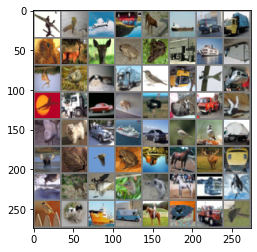

plane bird  plane car   dog   ship  car   truck cat   deer  deer  frog  frog  truck ship  truck deer  bird  dog   truck bird  truck plane car   plane truck car   dog   bird  dog   truck cat   dog   dog   car   ship  car   bird  bird  truck deer  frog  bird  frog  truck horse deer  car   deer  deer  plane bird  bird  horse truck plane bird  dog   ship  truck horse cat   truck bird 


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


batch_size= 64
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Back to code : defining the learning rate, optimizer and criterion

In [11]:
# *****START CODE
import torch

lr = 0.01
model = ConvNet(3,3, nb_labels= 16)
#validate_network(model, my_architecture_dict)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum = 0.9)
criterion = nn.CrossEntropyLoss()
epochs = 1
# *****END CODE

In [12]:
# Complete the hyperparams dict with the infos of your run
# *****START CODE
hyperparams = {"Batch size":batch_size,
               "Learning rate":lr,
               "Epochs":epochs}
# *****END CODE

# Init the WandB run with hyperparams
wandb.init(config=hyperparams)

wandb: Currently logged in as: adrienloizeau. Use `wandb login --relogin` to force relogin


### First training loop

In [13]:
# Training on GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [14]:
# Accuracy = (TP+TN)/(TP+TN+FP+FN) # How the models performs accross all classes
def accuracy(preds, labels):
    return (labels==preds.cpu()).sum()/len(labels) # Argmax of logits is the argmax of the predictions (the softmax of the logits)

# Precision = TP / (TP+FP) # How reliable the model is in classifying samples as Positive
# Think about how the confusion matrix is constructed!
def precision(cm):
    return [col[i]/col.sum() for i, col in enumerate(cm.T)]

# Recall = TP / (TP+FN)
# Think about how the confusion matrix is constructed!
def recall(cm):
    return [row[i]/row.sum() for i, row in enumerate(cm)]

In [15]:
def first_training_loop(model, epochs, train_dataloader, val_dataloader, optimizer, criterion, device):
    total_train_losses = []
    total_val_losses = []

    for epoch in range(1,epochs+1):
        print(f'epoch: {epoch}')
        ##TRAINING##
        model.train()
        train_losses = []
        trn_lbl = torch.Tensor([])
        trn_preds = torch.Tensor([])
        for i, batch, in enumerate(tqdm(train_dataloader)):
            img_batch, lbl_batch = batch
            trn_lbl=torch.cat((trn_lbl, lbl_batch))
            img_batch, lbl_batch = img_batch.to(device), lbl_batch.to(device)

            optimizer.zero_grad()
            logits = model(img_batch)
            trn_preds=torch.cat((trn_preds, logits.argmax(1).cpu()))
            loss=criterion(logits, lbl_batch)
            wandb.log({"train_loss":loss.item()}) # log the training loss at each batch
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        train_acc=accuracy(trn_preds, trn_lbl)
        train_loss_mean = np.mean(train_losses)
        total_train_losses.append(train_loss_mean)


In [16]:

def save_model(model, path):# Saving the model
  torch.save(model.state_dict(), path)

In [17]:
#first_training_loop(model, epochs, train_dataloader, val_dataloader, optimizer, criterion, device)
#save_model(model, "first_modele-1.pth")

## 1d) Validate your model

- Show that the model is not overfitting
- How does your model perform ?

In [18]:
from tqdm import tqdm 
from sklearn import metrics

def training_loop(model, epochs, train_dataloader, val_dataloader, optimizer, criterion, device):
    total_train_losses = []
    total_train_acc = []
    total_val_losses = []
    total_val_acc = []

    for epoch in range(1,epochs+1):
        print(f'epoch: {epoch}')
        ##TRAINING##
        model.train()
        train_losses = []
        trn_lbl = torch.Tensor([])
        trn_preds = torch.Tensor([])
        for i, batch, in enumerate(tqdm(train_dataloader)):
            img_batch, lbl_batch = batch
            trn_lbl=torch.cat((trn_lbl, lbl_batch))
            img_batch, lbl_batch = img_batch.to(device), lbl_batch.to(device)

            optimizer.zero_grad()
            logits = model(img_batch)
            trn_preds=torch.cat((trn_preds, logits.argmax(1).cpu()))
            loss=criterion(logits, lbl_batch)
            wandb.log({"train_loss":loss.item()}) # log the training loss at each batch
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        train_acc=accuracy(trn_preds, trn_lbl)
        train_loss_mean = np.mean(train_losses)

        total_train_losses.append(train_loss_mean)
        total_train_acc.append(train_acc)

        ##VALIDATION##
        model.eval()
        val_losses = []
        val_lbl = torch.Tensor([])
        val_preds = torch.Tensor([])
        with torch.no_grad():

            for i, batch, in enumerate(tqdm(val_dataloader)):
                img_batch, lbl_batch = batch
                val_lbl=torch.cat((val_lbl, lbl_batch))
                img_batch, lbl_batch = img_batch.to(device), lbl_batch.to(device)

                logits=model(img_batch)
                val_preds=torch.cat((val_preds, logits.argmax(1).cpu()))
                loss=criterion(logits, lbl_batch)

                val_losses.append(loss.item())

        val_acc=accuracy(val_preds, val_lbl)
        val_loss_mean = np.mean(val_losses)
        wandb.log({"train_acc":train_acc, "val_acc":val_acc, "val_loss":val_loss_mean}) # log the train & val accuracy and the val loss at each epoch
        
        total_val_losses.append(val_loss_mean)
        total_val_acc.append(val_acc)

    cm = confusion_matrix(val_lbl, val_preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=classes)
    disp.plot(xticks_rotation='vertical')
    plt.show()
    print(f'Accuracy: {accuracy(val_lbl, val_preds)}')
    print(f'Precision: {precision(cm)}')
    print(f'Recall: {recall(cm)}')
    print(classification_report(val_lbl, val_preds, target_names=classes))

    
    return total_train_losses, total_train_acc, total_val_acc, total_val_losses

    # save_graph(total_train_losses, total_val_losses, epochs, save_folder)



In [19]:
lr = 0.01
model = ConvNet(3,3, nb_labels= 16)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
epochs = 10

# Training on GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

hyperparams = {"Batch size":batch_size,
               "Learning rate":lr,
               "Epochs":epochs}
# *****END CODE

# Init the WandB run with hyperparams
#wandb.init(config=hyperparams)

#total_train_losses, total_train_acc, total_val_acc, total_val_losses = training_loop(model, epochs, train_dataloader, val_dataloader, optimizer, criterion, device)

#save_model(model, "model-e10-lr01.pth")

In [20]:
import matplotlib.pyplot as plt
# plot the graphs 

def plot_results(total_train_losses, total_train_acc, total_val_acc, total_val_losses, epochs) :
  # Accuracy
  fig, ax = plt.subplots()
  ax.plot(range(epochs),total_val_acc )
  ax.plot(range(epochs),total_train_acc )
  plt.title("Accuracy for each epoch for the training and the validation set")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.show()

  # Loss 
  fig, ax = plt.subplots()
  ax.plot(range(epochs),total_val_losses )
  ax.plot(range(epochs),total_train_acc )
  plt.title("Loss for each epoch for the training and the validation set")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.show()

#plot_results(total_train_losses, total_train_acc, total_val_acc, total_val_losses, epochs)

**How does the model perform ?**

From the graphs we can see that the training has gone well as threw time our each epoch our model is giving better and better performances on the training set. 
We can also see that the model seems to overfit as it has better performances on the train dataset but very poor ones on the validation..

The confusion matrix seems to validate our observations as the F1-score is only XX. The accuracy isn't also very good neither are the other Precision and Recall. 

One solution we could have would be to optimize the hyperparameters.

## 1e) Try to optimize hyperparameters, does it improve the performance of your model ?
Anwser with a graph and comment on the result.

Let's first of all try with different learning rates:

epoch: 1


100%|██████████| 157/157 [00:03<00:00, 42.92it/s]


epoch: 2


100%|██████████| 157/157 [00:05<00:00, 26.73it/s]


epoch: 3


100%|██████████| 157/157 [00:03<00:00, 43.42it/s]


epoch: 4


100%|██████████| 157/157 [00:03<00:00, 44.58it/s]


epoch: 5


100%|██████████| 157/157 [00:03<00:00, 43.17it/s]


epoch: 6


100%|██████████| 157/157 [00:03<00:00, 44.99it/s]


epoch: 7


100%|██████████| 157/157 [00:04<00:00, 31.70it/s]


epoch: 8


100%|██████████| 157/157 [00:03<00:00, 43.04it/s]


epoch: 9


100%|██████████| 157/157 [00:04<00:00, 31.73it/s]


epoch: 10


100%|██████████| 157/157 [00:03<00:00, 45.57it/s]


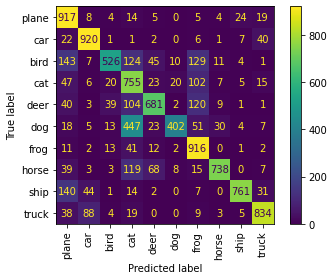

Accuracy: 0.7450000047683716
Precision: [0.6480565371024735, 0.8471454880294659, 0.842948717948718, 0.4609279609279609, 0.7909407665505227, 0.9054054054054054, 0.6735294117647059, 0.9190535491905355, 0.937192118226601, 0.8714733542319749]
Recall: [0.917, 0.92, 0.526, 0.755, 0.681, 0.402, 0.916, 0.738, 0.761, 0.834]
              precision    recall  f1-score   support

       plane       0.65      0.92      0.76      1000
         car       0.85      0.92      0.88      1000
        bird       0.84      0.53      0.65      1000
         cat       0.46      0.76      0.57      1000
        deer       0.79      0.68      0.73      1000
         dog       0.91      0.40      0.56      1000
        frog       0.67      0.92      0.78      1000
       horse       0.92      0.74      0.82      1000
        ship       0.94      0.76      0.84      1000
       truck       0.87      0.83      0.85      1000

    accuracy                           0.74     10000
   macro avg       0.79      0.74

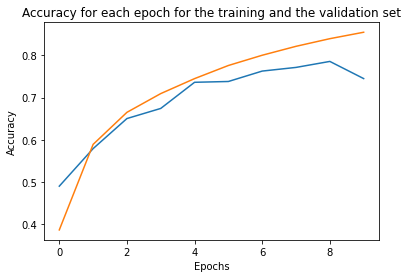

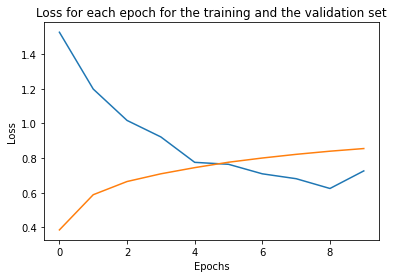

train_acc,▁▄▅▆▆▇▇███
train_loss,█▆▆▅▆▄▃▅▄▄▃▄▃▃▃▄▂▅▂▃▂▃▂▂▂▂▁▃▂▂▂▂▂▁▂▂▂▁▂▂
val_acc,▁▃▅▅▇▇▇██▇
val_loss,█▅▄▃▂▂▂▁▁▂
train_acc,0.85492
train_loss,0.25521
val_acc,0.745
val_loss,0.72608


In [ ]:
# Train a model from scratch for all these different learning rates

rates = [10**(-2),10**(-3), 10**(-4), 10**(-5)]


for lr in rates : 

  print("#"*20,f"\t {lr}","#"*20)
  model = ConvNet(3,3, nb_labels= 16)
  criterion = nn.CrossEntropyLoss()
  epochs = 10
  optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum = 0.9)

  # Training on GPU
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  model.to(device)

  hyperparams = {"Batch size":batch_size,
                "Learning rate":lr,
                "Epochs":epochs}

  # Init the WandB run with hyperparams
  wandb.init(config=hyperparams)
  
  total_train_losses, total_train_acc, total_val_acc, total_val_losses = training_loop(model, epochs, train_dataloader, val_dataloader, optimizer, criterion, device)
  save_model(model, f"model-e10-lr{lr}.pth")
  plot_results(total_train_losses, total_train_acc, total_val_acc, total_val_losses, epochs)

**Modifying the learning rate**


To compare these different models, we can compare their accuracy, F1score and  and the graphs.
The model that has the best accuracy is the one with a learning rate of $10^{-X}$.   

## 1f) Get an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

In [ ]:
# The intermediate layer you should visualize:
print('My intermediate layer to visualize is: %s'%(my_architecture_dict['visualize']))

In [ ]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv =   # e.g 64
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet()
model.load_state_dict(torch.load('drive/..../model.pt')) 
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(

    
)
# *****END CODE

## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt =   #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE

    # *****END CODE

    ## Define optimizer.
    # *****START CODE
    
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()

        ## Feedforward propagation
        ## Hint: In order to find the loss, compupte the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE
        
        
        
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()

## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

## 1g) Use GradCAM algorithm to visualize the saliency maps of your trained model at the same intermediate layer
*   Install pytorch grad cam package if needed (https://github.com/jacobgil/pytorch-grad-cam)
*   Complete the following code that visualizes GradCAM heatmaps on an input image from your model
*   Try on several input images / classes. 
*   Write a small description commenting on the visualized heatmaps. 

In [ ]:
# Install pytorch grad cam package
'''UNCOMMENT IF NEEDED (using google colab for example)
! pip install grad-cam
'''


In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
use_cuda = True

# *****START CODE
model = ConvNet()
model.load_state_dict(torch.load('drive/..../model.pt'))

# Get your intermediate layer
target_layers = [model. ...]

rgb_img = 
input_tensor = # Create an input tensor from your image for your model..
# Note: input_tensor can be a batch tensor with several images!
target_category = 
# *****END CODE

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=use_cuda)

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# Plot figure
plt.figure()
plt.imshow(visualization)

### Question 2 - Train on geometrical shapes

Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. Create a convolutional neural network that receives as input the triangle image and predicts the corresponding (x,y) coordinates of the triangle's vertices. 
*  Read and understand the following code

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle():
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata = generate_a_drawing(figsize, U, V)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im, v] = generate_a_triangle()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset_regression(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle()
    X = X / 255
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300)
    return [X_test, Y_test]

2a) Use function 'generate_dataset_regression' to create the dataset. Split the dataset to training and validation parts.

In [ ]:
##generate dataset
# *****START CODE

# *****END CODE

In [ ]:
##split the dataset to training and validation parts
# *****START CODE

# *****END CODE

2b) Use function 'generate_test_set' to create the testing dataset.

In [ ]:
##generate test dataset
# *****START CODE

# *****END CODE

2c) Create your own convolutional neural network.
* Begin with the previous exercise model architecture
* Optimize the architecture to perform well on predicting the different coordinates

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNetR(nn.Module):
    def __init__(self):
        super(ConvNetR, self).__init__()



    def forward(self, x):


# *****END CODE

2d) Define learning rate, model, optimizer, criterion and number of epochs.

In [ ]:
# *****START CODE
lr = 
model = 
optimizer = 
criterion = 
epochs = 
# *****END CODE

2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?

2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

In [ ]:
# *****START CODE



# *****END CODE

2g) Think and implement a preprocessing step that can boost the accuracy of your network

In [ ]:
# *****START CODE



# *****END CODE

#Question 3
Answer these generic questions:

3a) What is a metric? What is a loss? What is the difference between both?

Your answer:

3b) Why deep learning models are difficult to understand even on a particular prediction?

Your answer:

3c) What is "out of domain data"?

Your answer:

3d) Name five tasks where Deep Learning models are the state-of-the-art:
For example: Folding proteins in Biology

Your answer:

3e)What is an “activation function” and what is it used for in Deep Learning models?

Your answer: